In [1]:
import pandas as pd
df_train = pd.read_json('train.json')

In [2]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

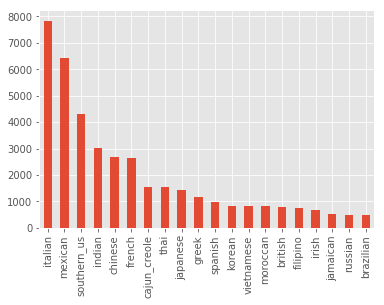

In [4]:
df_train['cuisine'].value_counts().plot(kind='bar')
data = pd.read_csv('matrix.csv')
data.set_index('cuisine',inplace=True)

In [5]:
data.columns


Index(['condensedsoup', 'frozenspinach', 'condensedcheddarcheesesoup',
       'citrusfruit', 'gratedgruyrecheese', 'freshdates',
       'roteldicedtomatoesgreenchilies', 'orangeglaze', 'wholewheatpennepasta',
       'tysoncrispychickenstrips',
       ...
       'oldelpasoflourtortillas', 'pumpkinseeds', 'crispyricecereal',
       'knorrtomatobouillonwithchickenflavorcube', 'gelato', 'browngravy',
       'agaragarflakes', 'ediblegoldleaf', 'sorghummolasses', 'liquidhoney'],
      dtype='object', length=6651)

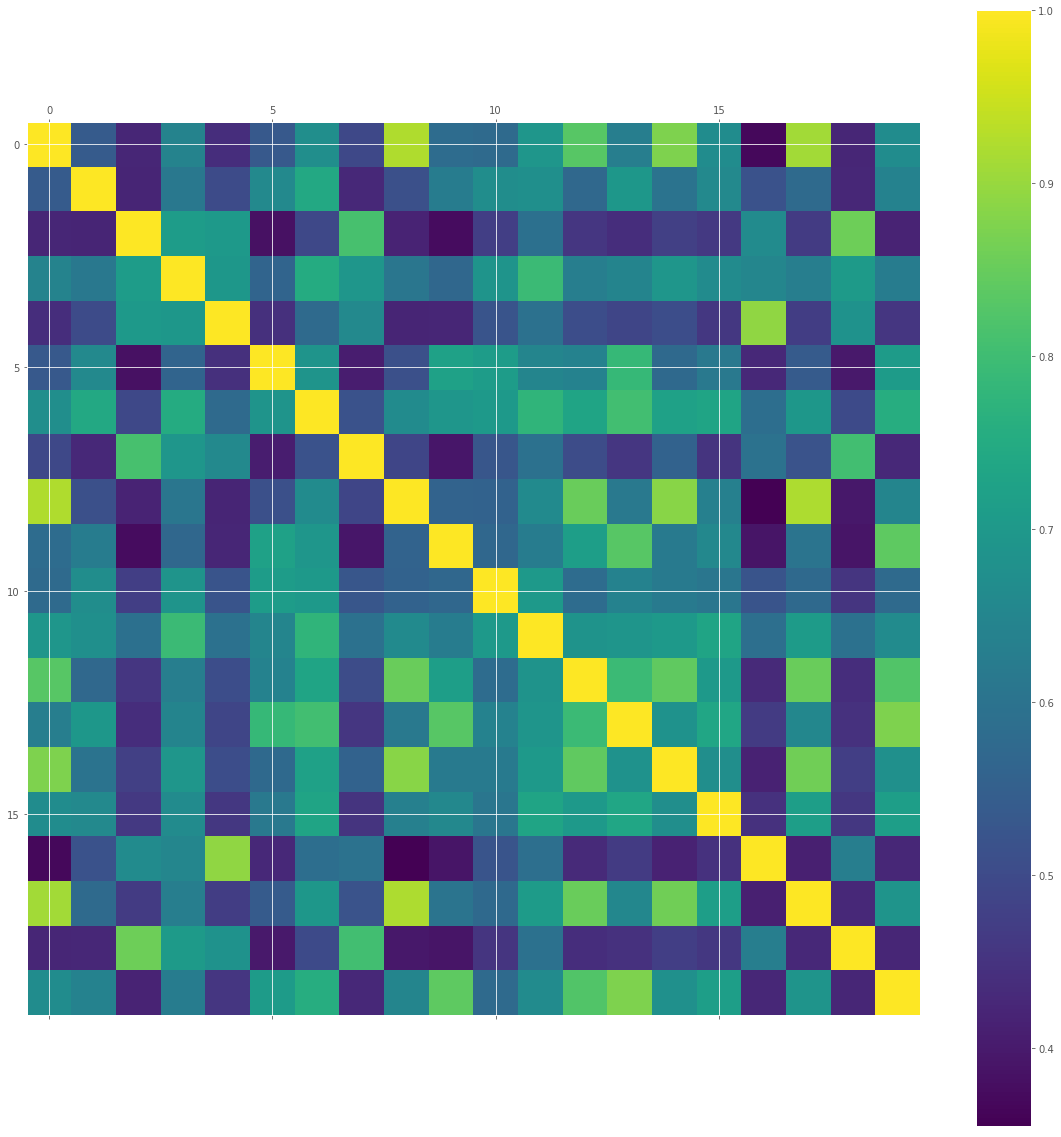

In [6]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(data)

import matplotlib.pyplot as plt
fig  = plt.figure(figsize = (20,20))
cax = plt.matshow(cos,fignum =1)
fig.colorbar(cax)
plt.show()

In [7]:
df_dummy = pd.read_csv('result.csv')
df_dummy = df_dummy.drop('Max',1)

In [8]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    string = string[3:len(string)-1] #(c for c in string if 0 < ord(c) < 127)
    return string

df_dummy.columns = [strip_non_ascii(x) for x in df_dummy.columns]

In [9]:
df_dummy.rename(columns = {'':'ingredients'},inplace = True)
df_dummy_t = df_dummy.set_index('ingredients').T
data1 = df_dummy_t

In [10]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    string = string[3:len(string)-1] #(c for c in string if 0 < ord(c) < 127)
    return string

data1.columns = [strip_non_ascii(x) for x in data1.columns]

In [11]:
for i in range(0,20):
    data1.iloc[i,6787] = data1.iloc[i,6787][:len(data1.iloc[i,6787])-1]

In [12]:
data1.head()


,salt,oliveoil,garliccloves,gratedparmesancheese,onions,garlic,groundblackpepper,extra,virginoliveoil,soysauce,...,other,englishbreakfastteabags,porkbackribs,chioggia,chilepuree,toasts,browngravy,agaragarflakes,sorghummolasses,liquidhoney'
chinese,907,135,421,3,280,763,153,12,12,1363,...,0,0,0,0,1,0,0,1,0,1
moroccan,414,412,223,3,280,143,147,128,128,4,...,0,0,0,0,0,0,0,0,0,1
british,407,54,29,7,142,34,71,19,19,2,...,0,0,0,0,0,0,0,0,0,1
greek,572,504,254,33,185,216,221,229,229,5,...,0,0,0,0,0,0,0,0,0,1
russian,289,50,43,0,145,20,53,6,6,3,...,0,0,0,0,0,0,0,0,0,1


In [27]:
import math
idf = {}

tmp = 0
for ing in data1.columns:
    count = 0
    for index,row in data1.iterrows():    
        if int(row[ing]) > 0:
            count+=1
    if count!=0:
        idf[ing] = math.log(21/count)
    else:
        idf[ing] = 0

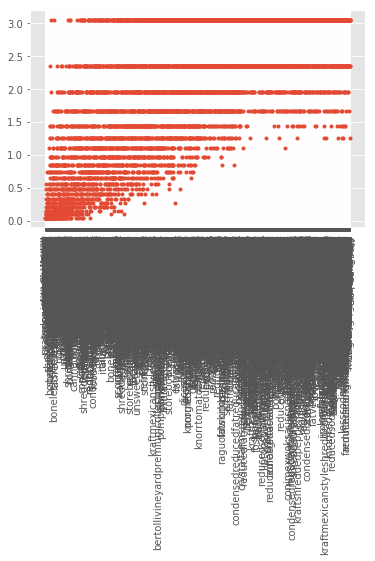

In [14]:
#ingredients vs idf
x = range(0,6787)  
xTicks = list(idf.keys())
y = list(idf.values())
import pylab as pl
pl.xticks(x, xTicks)
pl.xticks(range(6787), xTicks,rotation = 90)
pl.plot(x,y,'.')
pl.show()

In [28]:
ls = {}
from __future__ import division
tfidf_data = data1
tmp = 0
for ingredient in tfidf_data.columns:
    max_ing = tfidf_data[ingredient].astype(int).max()
    for index,row in tfidf_data.iterrows():
        if max_ing!=0:
            row[ingredient] = idf[ingredient]*(float(float(row[ingredient])/float(max_ing)))
        else:
            row[ingredient] = 0


In [29]:
tfidf_data

,salt,oliveoil,garliccloves,gratedparmesancheese,onions,garlic,groundblackpepper,extra,virginoliveoil,soysauce,...,other,englishbreakfastteabags,porkbackribs,chioggia,chilepuree,toasts,browngravy,agaragarflakes,sorghummolasses,liquidhoney'
chinese,0.0128009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.25017,0,0,3.13556,0,1.96611
moroccan,0.00584296,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.96611
british,0.00574417,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.96611
greek,0.00807289,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.96611
russian,0.00407878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.96611
southern_us,0.032348,0,0,0,0,0,0,0,0,0,...,0,0,2.27983,0,0,0,0,0,3.13556,1.96611
irish,0.00530665,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mexican,0.0386991,0,0,0,0,0,0,0,0,0,...,3.25017,0,0,0,0,0,0,0,0,0
vietnamese,0.00372595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brazilian,0.00273801,0,0,0,0,0,0,0,0,0,...,3.25017,0,2.27983,0,0,0,0,0,0,0


In [17]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
coss = cosine_similarity(tfidf_data)

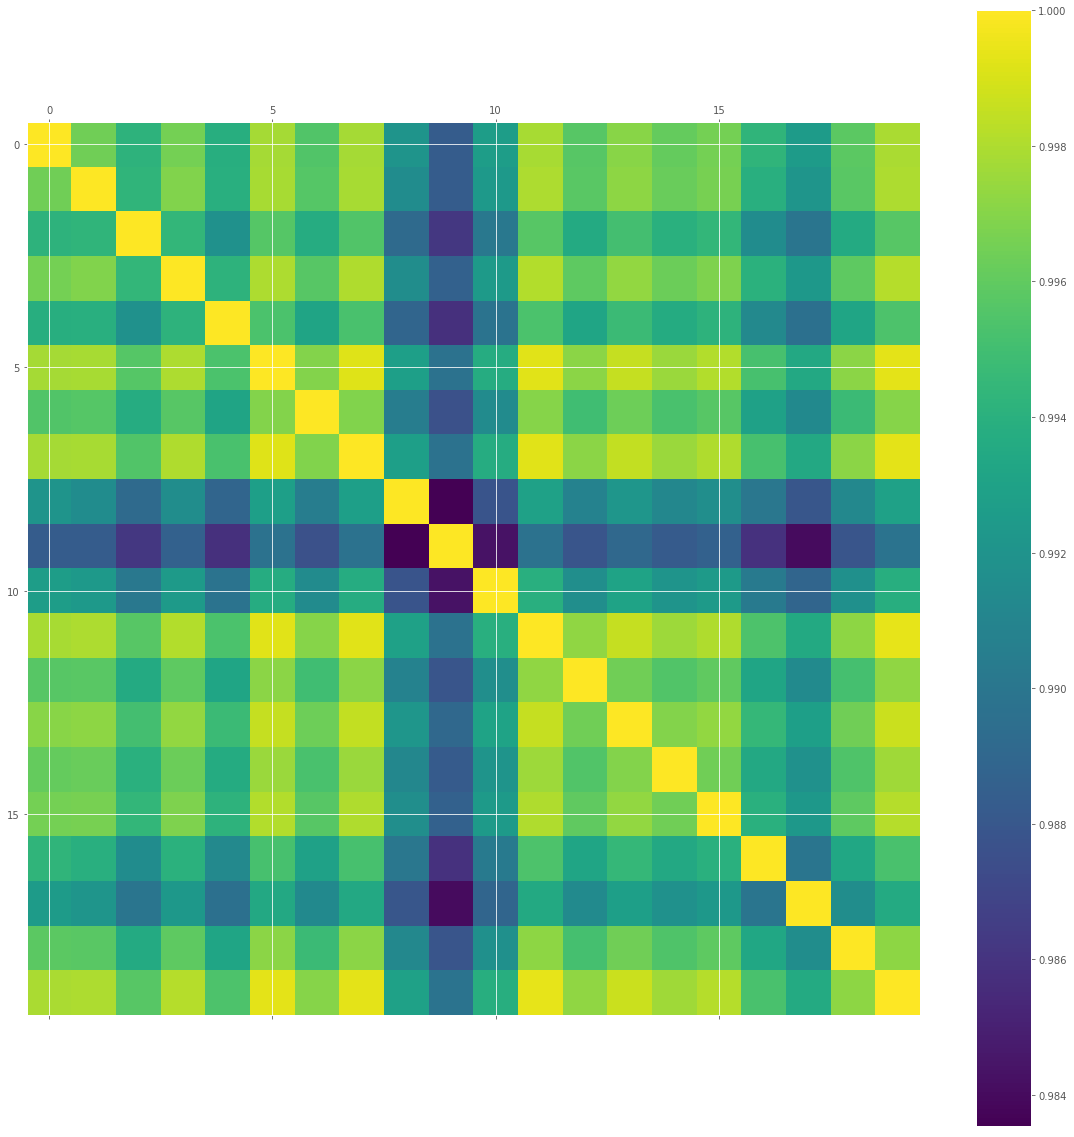

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
cax = plt.matshow(coss,fignum =1)
fig.colorbar(cax)
plt.show()

In [19]:
cuisine_count = {}
for cui in df_train['cuisine']:
    if not cui in cuisine_count:
            cuisine_count[cui] = 1
    else:
        cuisine_count[cui] += 1

In [39]:
for index,row in df_train.iterrows():
    l = []
    for entry_in in df_train.loc[index,'ingredients']:
        symbols = " -./\\(),\'!&%1234567890"
        for symbol in symbols:
            entry_in = entry_in.replace(symbol,'')
        entry_in = entry_in.lower()
        entry_in = entry_in.encode('ascii','ignore').decode('utf-8')
        l.append(entry_in)
    df_train.set_value(index,'ingredients',l)

#df_train.to_csv('df_train.csv')

In [30]:
data.head()

,condensedsoup,frozenspinach,condensedcheddarcheesesoup,citrusfruit,gratedgruyrecheese,freshdates,roteldicedtomatoesgreenchilies,orangeglaze,wholewheatpennepasta,tysoncrispychickenstrips,...,oldelpasoflourtortillas,pumpkinseeds,crispyricecereal,knorrtomatobouillonwithchickenflavorcube,gelato,browngravy,agaragarflakes,ediblegoldleaf,sorghummolasses,liquidhoney
cuisine,,,,,,,,,,,,,,,,,,,,,
irish,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mexican,0,4,2,0,1,0,4,0,1,0,...,4,35,0,3,0,0,0,0,0,0
chinese,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
filipino,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vietnamese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
print(cuisine_count)

{'greek': 1175, 'southern_us': 4320, 'filipino': 755, 'indian': 3003, 'jamaican': 526, 'spanish': 989, 'italian': 7838, 'mexican': 6438, 'chinese': 2673, 'british': 804, 'thai': 1539, 'vietnamese': 825, 'cajun_creole': 1546, 'brazilian': 467, 'french': 2646, 'japanese': 1423, 'irish': 667, 'korean': 830, 'moroccan': 821, 'russian': 489}


In [32]:
for ing in data.columns:
    for index,row in data.iterrows():
        data.loc[index,ing] = float(float(row[ing])/float(cuisine_count[index]))


In [33]:
data.head()

,condensedsoup,frozenspinach,condensedcheddarcheesesoup,citrusfruit,gratedgruyrecheese,freshdates,roteldicedtomatoesgreenchilies,orangeglaze,wholewheatpennepasta,tysoncrispychickenstrips,...,oldelpasoflourtortillas,pumpkinseeds,crispyricecereal,knorrtomatobouillonwithchickenflavorcube,gelato,browngravy,agaragarflakes,ediblegoldleaf,sorghummolasses,liquidhoney
cuisine,,,,,,,,,,,,,,,,,,,,,
irish,0.000000,0.000000,0.000000,0.001499,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
mexican,0.000000,0.000621,0.000311,0.000000,0.000155,0.0,0.000621,0.0,0.000155,0.000000,...,0.000621,0.005436,0.0,0.000466,0.0,0.0,0.000000,0.0,0.0,0.000000
chinese,0.000000,0.000374,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000374,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000374,0.0,0.0,0.000374
filipino,0.001325,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
vietnamese,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [34]:
pred_cuisine = ''
pred_correct = 0
total_cuisine = 0
tmp = 0

for dish,row in df_train.iterrows():
    pred_prob = 0
    for cui, data_row in data.iterrows(): 
        if tmp==0:
            tmp = 1
            continue
        prob = 1
        for ing in df_train.loc[dish,'ingredients']:  
            prob *= data.loc[cui,ing]*float(cuisine_count[cui]) 
            if prob > pred_prob:
                pred_prob = prob
                pred_cuisine = cui
    #print()
    if row['cuisine']==pred_cuisine:
        pred_correct+=1
    total_cuisine+=1
    #print(pred_prob)
    print(row['cuisine'],":",pred_cuisine)


greek : mexican
southern_us : southern_us
filipino : mexican
indian : mexican
indian : indian
jamaican : southern_us
spanish : mexican
italian : italian
mexican : mexican
italian : italian
italian : italian
chinese : chinese
italian : italian
mexican : mexican
italian : italian
indian : indian
british : italian
italian : italian
thai : thai
vietnamese : chinese
thai : thai
mexican : mexican
southern_us : southern_us
chinese : chinese
italian : italian
chinese : chinese
cajun_creole : mexican
italian : italian
chinese : chinese
mexican : mexican
italian : italian
cajun_creole : cajun_creole
mexican : mexican
thai : thai
italian : italian
cajun_creole : cajun_creole
italian : italian
filipino : chinese
southern_us : mexican
southern_us : southern_us
italian : italian
brazilian : mexican
mexican : mexican
indian : indian
mexican : mexican
chinese : southern_us
french : italian
southern_us : southern_us
southern_us : southern_us
southern_us : southern_us
japanese : chinese
southern_us : so

italian : italian
italian : italian
french : italian
italian : italian
thai : thai
mexican : mexican
italian : italian
italian : italian
thai : thai
greek : italian
southern_us : italian
mexican : southern_us
italian : italian
italian : italian
cajun_creole : mexican
thai : thai
mexican : indian
irish : irish
japanese : chinese
mexican : mexican
italian : italian
mexican : mexican
italian : italian
italian : italian
southern_us : southern_us
indian : indian
italian : italian
french : italian
japanese : japanese
southern_us : southern_us
italian : italian
mexican : mexican
british : mexican
mexican : mexican
mexican : southern_us
french : southern_us
moroccan : indian
chinese : chinese
korean : korean
indian : indian
chinese : chinese
southern_us : southern_us
italian : italian
mexican : mexican
southern_us : southern_us
cajun_creole : italian
southern_us : southern_us
spanish : italian
italian : italian
vietnamese : vietnamese
korean : chinese
chinese : chinese
italian : southern_us
so

french : italian
mexican : southern_us
chinese : chinese
italian : italian
italian : italian
spanish : italian
korean : korean
italian : italian
cajun_creole : southern_us
british : southern_us
cajun_creole : italian
japanese : japanese
thai : thai
greek : italian
italian : italian
russian : italian
mexican : mexican
mexican : southern_us
mexican : mexican
spanish : spanish
french : italian
mexican : mexican
vietnamese : chinese
greek : italian
italian : italian
chinese : chinese
italian : italian
japanese : japanese
italian : italian
southern_us : southern_us
irish : southern_us
indian : indian
brazilian : brazilian
indian : indian
thai : thai
southern_us : southern_us
british : italian
chinese : chinese
mexican : mexican
italian : italian
mexican : italian
thai : indian
jamaican : mexican
cajun_creole : cajun_creole
vietnamese : vietnamese
chinese : chinese
southern_us : mexican
southern_us : southern_us
french : southern_us
italian : italian
chinese : chinese
french : french
chinese

cajun_creole : cajun_creole
mexican : mexican
spanish : southern_us
thai : thai
moroccan : indian
southern_us : chinese
indian : indian
moroccan : indian
japanese : chinese
thai : mexican
vietnamese : chinese
chinese : chinese
mexican : mexican
jamaican : mexican
french : southern_us
italian : italian
italian : italian
italian : italian
mexican : mexican
russian : italian
italian : italian
southern_us : italian
french : italian
greek : greek
indian : mexican
southern_us : southern_us
chinese : chinese
chinese : chinese
southern_us : southern_us
mexican : mexican
thai : thai
spanish : spanish
italian : italian
mexican : mexican
mexican : mexican
vietnamese : vietnamese
mexican : mexican
italian : italian
southern_us : southern_us
italian : italian
irish : irish
mexican : mexican
italian : italian
cajun_creole : cajun_creole
chinese : chinese
chinese : chinese
chinese : chinese
southern_us : southern_us
spanish : mexican
cajun_creole : cajun_creole
cajun_creole : southern_us
chinese : ch

chinese : chinese
southern_us : italian
italian : italian
french : italian
chinese : chinese
korean : korean
moroccan : moroccan
indian : indian
italian : italian
italian : italian
mexican : mexican
southern_us : southern_us
mexican : mexican
russian : southern_us
mexican : mexican
chinese : chinese
moroccan : mexican
italian : italian
mexican : mexican
cajun_creole : cajun_creole
southern_us : southern_us
mexican : mexican
italian : italian
italian : italian
cajun_creole : italian
japanese : japanese
japanese : japanese
mexican : mexican
chinese : chinese
japanese : japanese
korean : chinese
spanish : mexican
korean : mexican
southern_us : southern_us
british : british
french : italian
indian : indian
southern_us : southern_us
chinese : chinese
cajun_creole : southern_us
chinese : chinese
mexican : mexican
southern_us : italian
jamaican : southern_us
chinese : chinese
southern_us : southern_us
thai : thai
italian : southern_us
italian : italian
italian : italian
indian : indian
indian

indian : indian
japanese : japanese
italian : italian
chinese : chinese
spanish : italian
british : italian
mexican : southern_us
moroccan : moroccan
jamaican : jamaican
italian : italian
chinese : chinese
southern_us : southern_us
vietnamese : vietnamese
mexican : mexican
italian : italian
italian : italian
southern_us : southern_us
korean : chinese
french : southern_us
russian : french
italian : italian
indian : indian
french : italian
mexican : mexican
filipino : mexican
korean : chinese
french : italian
italian : southern_us
indian : indian
japanese : japanese
cajun_creole : southern_us
chinese : chinese
mexican : mexican
italian : italian
chinese : chinese
mexican : mexican
moroccan : moroccan
italian : italian
irish : southern_us
italian : italian
italian : italian
moroccan : indian
italian : italian
chinese : chinese
mexican : mexican
indian : indian
southern_us : southern_us
italian : italian
chinese : chinese
southern_us : southern_us
spanish : mexican
thai : thai
mexican : me

indian : indian
indian : indian
southern_us : southern_us
brazilian : brazilian
mexican : mexican
spanish : italian
french : italian
french : french
thai : chinese
mexican : mexican
indian : indian
southern_us : chinese
indian : indian
mexican : mexican
indian : indian
jamaican : jamaican
vietnamese : thai
mexican : mexican
chinese : chinese
french : southern_us
indian : indian
cajun_creole : mexican
french : italian
british : british
brazilian : mexican
italian : italian
mexican : mexican
southern_us : southern_us
mexican : mexican
italian : italian
jamaican : southern_us
chinese : chinese
italian : italian
british : british
mexican : mexican
italian : italian
korean : korean
southern_us : southern_us
filipino : chinese
mexican : italian
indian : indian
southern_us : southern_us
italian : italian
italian : italian
italian : italian
southern_us : southern_us
chinese : chinese
french : french
southern_us : southern_us
cajun_creole : italian
italian : italian
french : italian
thai : thai

thai : thai
greek : southern_us
jamaican : jamaican
southern_us : italian
greek : italian
italian : italian
italian : italian
southern_us : mexican
mexican : mexican
italian : italian
italian : italian
filipino : southern_us
mexican : mexican
thai : thai
mexican : mexican
mexican : mexican
chinese : chinese
italian : italian
mexican : mexican
spanish : spanish
italian : southern_us
french : french
indian : indian
greek : italian
italian : italian
brazilian : southern_us
italian : italian
moroccan : italian
mexican : mexican
chinese : chinese
thai : thai
southern_us : southern_us
moroccan : indian
mexican : mexican
thai : thai
japanese : southern_us
italian : italian
mexican : mexican
mexican : mexican
thai : thai
french : italian
brazilian : brazilian
french : italian
indian : indian
russian : italian
mexican : mexican
thai : chinese
italian : italian
french : french
filipino : filipino
filipino : italian
french : french
indian : indian
italian : italian
jamaican : italian
italian : it

italian : italian
filipino : mexican
italian : italian
italian : italian
thai : thai
irish : french
moroccan : indian
mexican : mexican
mexican : mexican
italian : italian
italian : italian
southern_us : southern_us
italian : italian
italian : italian
italian : italian
italian : italian
indian : indian
italian : italian
southern_us : southern_us
french : french
chinese : chinese
russian : mexican
vietnamese : vietnamese
british : british
indian : indian
spanish : italian
italian : italian
italian : italian
french : italian
indian : indian
indian : indian
southern_us : southern_us
mexican : mexican
italian : italian
greek : italian
jamaican : southern_us
italian : italian
mexican : mexican
mexican : mexican
southern_us : italian
italian : italian
japanese : japanese
italian : italian
thai : thai
korean : korean
chinese : chinese
french : french
filipino : chinese
french : italian
moroccan : moroccan
italian : italian
italian : italian
chinese : chinese
mexican : mexican
italian : mexica

greek : italian
greek : southern_us
indian : indian
moroccan : moroccan
italian : mexican
indian : indian
italian : italian
thai : mexican
french : italian
cajun_creole : southern_us
filipino : thai
mexican : mexican
japanese : mexican
french : italian
mexican : mexican
greek : italian
indian : indian
japanese : chinese
russian : italian
indian : indian
mexican : mexican
cajun_creole : southern_us
mexican : mexican
irish : southern_us
italian : italian
french : italian
thai : thai
southern_us : mexican
indian : indian
korean : chinese
italian : italian
greek : southern_us
italian : italian
filipino : filipino
indian : indian
mexican : mexican
mexican : mexican
southern_us : southern_us
southern_us : southern_us
japanese : japanese
indian : indian
southern_us : southern_us
chinese : chinese
moroccan : italian
japanese : southern_us
cajun_creole : cajun_creole
italian : italian
french : italian
southern_us : italian
thai : thai
southern_us : southern_us
japanese : italian
moroccan : indi

cajun_creole : mexican
italian : italian
italian : italian
mexican : mexican
italian : italian
italian : italian
mexican : mexican
italian : italian
southern_us : southern_us
indian : indian
spanish : italian
mexican : mexican
mexican : mexican
jamaican : southern_us
british : french
southern_us : southern_us
italian : italian
mexican : mexican
southern_us : southern_us
italian : italian
mexican : mexican
irish : italian
jamaican : southern_us
italian : italian
italian : italian
southern_us : mexican
italian : italian
southern_us : southern_us
japanese : chinese
southern_us : southern_us
spanish : spanish
japanese : japanese
british : southern_us
southern_us : southern_us
mexican : mexican
french : french
italian : italian
southern_us : southern_us
greek : italian
southern_us : southern_us
irish : southern_us
greek : italian
mexican : mexican
chinese : chinese
russian : italian
cajun_creole : southern_us
chinese : chinese
irish : irish
mexican : mexican
filipino : filipino
italian : it

spanish : italian
mexican : mexican
italian : italian
greek : italian
spanish : italian
chinese : chinese
spanish : italian
greek : italian
vietnamese : vietnamese
cajun_creole : southern_us
japanese : japanese
cajun_creole : cajun_creole
italian : italian
italian : italian
filipino : italian
mexican : mexican
chinese : chinese
italian : italian
french : french
southern_us : southern_us
french : southern_us
japanese : japanese
italian : italian
british : british
mexican : mexican
italian : italian
thai : mexican
french : italian
filipino : chinese
thai : thai
vietnamese : chinese
mexican : mexican
italian : italian
indian : indian
chinese : chinese
jamaican : southern_us
southern_us : southern_us
chinese : chinese
british : british
southern_us : southern_us
british : southern_us
southern_us : southern_us
italian : italian
indian : indian
thai : thai
french : french
british : southern_us
italian : italian
southern_us : mexican
italian : italian
mexican : mexican
jamaican : mexican
chine

cajun_creole : cajun_creole
brazilian : thai
indian : indian
jamaican : mexican
french : italian
italian : italian
southern_us : southern_us
french : southern_us
chinese : southern_us
southern_us : southern_us
italian : italian
mexican : mexican
filipino : italian
irish : italian
southern_us : southern_us
mexican : mexican
mexican : mexican
southern_us : southern_us
irish : italian
mexican : mexican
mexican : mexican
brazilian : mexican
mexican : mexican
southern_us : southern_us
indian : indian
indian : indian
southern_us : southern_us
chinese : chinese
southern_us : southern_us
greek : italian
cajun_creole : mexican
mexican : mexican
french : french
southern_us : southern_us
italian : italian
mexican : mexican
mexican : southern_us
french : italian
chinese : chinese
moroccan : moroccan
mexican : mexican
japanese : japanese
mexican : mexican
french : italian
southern_us : southern_us
russian : southern_us
southern_us : southern_us
indian : indian
mexican : mexican
mexican : mexican
gr

mexican : mexican
british : italian
italian : italian
filipino : filipino
mexican : mexican
italian : italian
french : italian
japanese : french
russian : indian
italian : italian
french : french
korean : korean
greek : greek
cajun_creole : italian
french : italian
mexican : mexican
spanish : italian
italian : italian
chinese : chinese
french : italian
italian : italian
jamaican : italian
brazilian : italian
italian : italian
french : italian
mexican : mexican
indian : indian
italian : italian
british : southern_us
indian : indian
southern_us : southern_us
cajun_creole : cajun_creole
mexican : mexican
mexican : mexican
russian : southern_us
southern_us : southern_us
indian : indian
indian : indian
mexican : mexican
french : italian
southern_us : southern_us
brazilian : indian
brazilian : southern_us
japanese : chinese
southern_us : southern_us
cajun_creole : italian
japanese : japanese
chinese : chinese
italian : italian
cajun_creole : italian
mexican : italian
japanese : japanese
kore

mexican : mexican
moroccan : indian
japanese : japanese
vietnamese : vietnamese
russian : mexican
indian : italian
japanese : japanese
mexican : mexican
chinese : chinese
southern_us : southern_us
cajun_creole : italian
japanese : chinese
mexican : southern_us
mexican : mexican
irish : southern_us
mexican : mexican
italian : italian
cajun_creole : italian
italian : italian
southern_us : southern_us
chinese : chinese
spanish : french
southern_us : southern_us
italian : italian
mexican : mexican
mexican : mexican
thai : thai
italian : italian
southern_us : southern_us
mexican : mexican
italian : italian
french : italian
british : italian
indian : indian
mexican : mexican
mexican : mexican
italian : italian
italian : italian
indian : indian
southern_us : southern_us
mexican : mexican
chinese : chinese
mexican : mexican
cajun_creole : southern_us
italian : italian
italian : italian
british : british
japanese : chinese
mexican : mexican
chinese : chinese
italian : italian
indian : indian
in

italian : italian
italian : italian
italian : italian
southern_us : southern_us
brazilian : mexican
moroccan : italian
french : italian
filipino : filipino
british : southern_us
italian : italian
french : italian
mexican : mexican
french : italian
cajun_creole : cajun_creole
vietnamese : chinese
italian : italian
mexican : mexican
indian : indian
thai : thai
korean : korean
southern_us : southern_us
greek : italian
indian : mexican
mexican : mexican
russian : italian
jamaican : jamaican
italian : italian
italian : italian
thai : thai
greek : greek
mexican : mexican
cajun_creole : southern_us
italian : italian
japanese : southern_us
southern_us : southern_us
italian : italian
moroccan : italian
italian : italian
greek : italian
southern_us : southern_us
indian : indian
indian : indian
japanese : chinese
italian : italian
korean : chinese
italian : italian
southern_us : southern_us
japanese : indian
italian : italian
mexican : mexican
french : italian
cajun_creole : french
british : fren

mexican : mexican
mexican : mexican
indian : indian
french : italian
italian : italian
chinese : chinese
italian : italian
italian : italian
mexican : mexican
chinese : chinese
greek : greek
french : italian
japanese : chinese
mexican : mexican
southern_us : southern_us
french : italian
southern_us : italian
southern_us : italian
italian : italian
southern_us : southern_us
jamaican : chinese
moroccan : indian
korean : chinese
mexican : mexican
italian : italian
mexican : mexican
cajun_creole : cajun_creole
indian : indian
vietnamese : vietnamese
moroccan : italian
moroccan : indian
italian : italian
cajun_creole : southern_us
chinese : chinese
italian : italian
mexican : mexican
mexican : mexican
mexican : mexican
mexican : mexican
chinese : chinese
mexican : mexican
brazilian : italian
thai : chinese
indian : indian
southern_us : southern_us
mexican : mexican
indian : indian
italian : italian
italian : italian
mexican : mexican
irish : irish
southern_us : mexican
french : french
south

southern_us : southern_us
korean : korean
thai : indian
russian : italian
chinese : chinese
italian : italian
chinese : mexican
italian : italian
mexican : italian
indian : indian
southern_us : southern_us
mexican : mexican
korean : korean
british : british
japanese : mexican
british : southern_us
chinese : chinese
southern_us : southern_us
japanese : japanese
italian : italian
indian : mexican
irish : irish
greek : italian
cajun_creole : cajun_creole
italian : italian
chinese : chinese
italian : italian
filipino : filipino
greek : italian
southern_us : italian
indian : indian
italian : italian
mexican : mexican
mexican : mexican
southern_us : italian
greek : greek
indian : indian
italian : italian
italian : italian
jamaican : mexican
italian : italian
spanish : french
italian : italian
indian : indian
italian : italian
british : british
irish : british
mexican : southern_us
chinese : chinese
greek : italian
british : thai
italian : italian
italian : italian
mexican : mexican
cajun_cre

mexican : mexican
mexican : mexican
southern_us : southern_us
southern_us : southern_us
mexican : mexican
irish : italian
russian : southern_us
chinese : chinese
japanese : japanese
irish : mexican
italian : italian
southern_us : southern_us
southern_us : southern_us
southern_us : southern_us
italian : italian
vietnamese : filipino
italian : italian
japanese : chinese
thai : thai
irish : italian
italian : italian
thai : thai
french : southern_us
french : italian
brazilian : mexican
mexican : mexican
italian : italian
indian : indian
italian : italian
cajun_creole : southern_us
mexican : mexican
italian : italian
italian : italian
indian : indian
italian : italian
southern_us : southern_us
mexican : mexican
italian : italian
indian : indian
italian : italian
irish : italian
mexican : mexican
mexican : mexican
southern_us : southern_us
italian : italian
indian : indian
cajun_creole : italian
southern_us : southern_us
french : french
indian : indian
mexican : mexican
indian : indian
frenc

spanish : southern_us
thai : thai
southern_us : southern_us
filipino : southern_us
southern_us : southern_us
mexican : mexican
mexican : mexican
southern_us : southern_us
mexican : mexican
moroccan : mexican
mexican : mexican
italian : italian
mexican : mexican
italian : italian
italian : italian
mexican : mexican
italian : italian
italian : italian
mexican : mexican
chinese : chinese
korean : chinese
southern_us : southern_us
italian : italian
french : french
french : southern_us
italian : italian
chinese : chinese
british : mexican
chinese : chinese
italian : italian
italian : italian
chinese : chinese
italian : italian
italian : italian
italian : italian
thai : chinese
brazilian : mexican
southern_us : southern_us
spanish : italian
italian : italian
japanese : chinese
japanese : indian
indian : indian
greek : italian
greek : italian
southern_us : southern_us
irish : italian
russian : italian
southern_us : southern_us
chinese : chinese
italian : italian
southern_us : southern_us
caju

italian : italian
greek : italian
greek : greek
cajun_creole : mexican
italian : italian
vietnamese : chinese
italian : italian
italian : italian
british : british
mexican : mexican
japanese : italian
thai : thai
korean : chinese
italian : italian
mexican : mexican
mexican : mexican
southern_us : southern_us
mexican : mexican
italian : italian
japanese : japanese
mexican : mexican
indian : indian
chinese : chinese
southern_us : southern_us
korean : chinese
italian : italian
spanish : mexican
italian : italian
italian : italian
italian : italian
italian : italian
italian : italian
southern_us : southern_us
italian : italian
spanish : italian
chinese : chinese
italian : italian
vietnamese : chinese
mexican : mexican
french : italian
jamaican : mexican
indian : indian
indian : indian
greek : italian
italian : italian
moroccan : mexican
mexican : mexican
italian : italian
vietnamese : thai
chinese : chinese
italian : italian
mexican : mexican
cajun_creole : southern_us
french : italian
sou

southern_us : southern_us
italian : italian
brazilian : mexican
italian : italian
greek : mexican
italian : italian
italian : italian
french : italian
cajun_creole : cajun_creole
italian : italian
chinese : chinese
moroccan : indian
cajun_creole : mexican
southern_us : italian
thai : thai
chinese : southern_us
italian : mexican
vietnamese : chinese
italian : italian
italian : southern_us
southern_us : cajun_creole
indian : indian
italian : italian
indian : indian
cajun_creole : cajun_creole
italian : italian
italian : italian
cajun_creole : italian
mexican : mexican
chinese : chinese
cajun_creole : italian
indian : indian
vietnamese : vietnamese
filipino : mexican
mexican : mexican
japanese : chinese
greek : italian
korean : chinese
southern_us : southern_us
jamaican : indian
mexican : mexican
vietnamese : vietnamese
mexican : mexican
italian : italian
french : french
mexican : mexican
mexican : mexican
italian : italian
italian : italian
italian : italian
mexican : mexican
mexican : m

chinese : chinese
thai : thai
italian : italian
mexican : mexican
french : italian
chinese : thai
mexican : mexican
jamaican : jamaican
irish : italian
chinese : italian
italian : italian
british : french
mexican : mexican
british : italian
greek : southern_us
indian : indian
filipino : chinese
indian : indian
mexican : mexican
italian : italian
italian : italian
cajun_creole : cajun_creole
italian : italian
french : french
thai : thai
japanese : chinese
indian : indian
chinese : chinese
mexican : mexican
cajun_creole : southern_us
italian : italian
french : italian
korean : korean
mexican : mexican
french : italian
french : italian
italian : italian
spanish : italian
moroccan : italian
italian : italian
italian : italian
southern_us : southern_us
indian : indian
mexican : mexican
mexican : mexican
irish : italian
vietnamese : vietnamese
southern_us : southern_us
filipino : indian
british : southern_us
french : french
mexican : italian
korean : chinese
italian : italian
french : italia

vietnamese : chinese
italian : italian
filipino : filipino
southern_us : southern_us
filipino : filipino
french : french
brazilian : mexican
mexican : southern_us
mexican : mexican
spanish : mexican
british : british
chinese : chinese
southern_us : southern_us
vietnamese : thai
mexican : mexican
indian : indian
greek : italian
filipino : indian
southern_us : southern_us
spanish : italian
jamaican : indian
indian : mexican
british : southern_us
mexican : mexican
southern_us : southern_us
italian : italian
jamaican : mexican
spanish : southern_us
filipino : mexican
greek : italian
indian : indian
mexican : southern_us
southern_us : southern_us
southern_us : italian
mexican : mexican
japanese : japanese
moroccan : italian
french : southern_us
british : southern_us
southern_us : southern_us
cajun_creole : french
mexican : mexican
korean : korean
french : italian
italian : italian
indian : indian
italian : italian
italian : italian
italian : italian
southern_us : southern_us
mexican : mexic

greek : greek
mexican : southern_us
italian : italian
chinese : chinese
italian : italian
italian : italian
southern_us : southern_us
filipino : filipino
italian : italian
italian : italian
filipino : mexican
cajun_creole : southern_us
mexican : mexican
thai : thai
indian : indian
chinese : chinese
french : french
southern_us : southern_us
thai : thai
italian : italian
italian : italian
mexican : mexican
chinese : chinese
mexican : mexican
southern_us : southern_us
southern_us : southern_us
spanish : italian
moroccan : italian
mexican : chinese
thai : mexican
thai : thai
french : french
french : italian
mexican : mexican
southern_us : italian
indian : indian
italian : italian
mexican : mexican
greek : greek
southern_us : mexican
italian : italian
irish : southern_us
italian : italian
chinese : mexican
indian : indian
mexican : mexican
southern_us : mexican
japanese : italian
cajun_creole : italian
southern_us : mexican
spanish : mexican
mexican : mexican
italian : italian
spanish : spa

italian : italian
italian : italian
vietnamese : chinese
southern_us : southern_us
indian : mexican
filipino : southern_us
moroccan : italian
italian : italian
southern_us : southern_us
italian : italian
italian : italian
moroccan : italian
japanese : japanese
italian : italian
thai : thai
italian : italian
southern_us : southern_us
southern_us : southern_us
french : italian
italian : italian
french : italian
korean : korean
moroccan : mexican
mexican : mexican
chinese : chinese
spanish : italian
british : southern_us
mexican : mexican
mexican : mexican
filipino : indian
japanese : chinese
indian : indian
southern_us : southern_us
italian : italian
korean : chinese
mexican : mexican
southern_us : southern_us
greek : italian
french : italian
mexican : mexican
italian : italian
southern_us : southern_us
italian : italian
thai : thai
greek : southern_us
mexican : mexican
korean : chinese
chinese : chinese
italian : italian
greek : southern_us
filipino : filipino
chinese : chinese
irish : 

thai : thai
japanese : japanese
southern_us : southern_us
mexican : mexican
korean : chinese
italian : italian
italian : italian
chinese : chinese
cajun_creole : southern_us
mexican : mexican
japanese : chinese
french : italian
thai : thai
chinese : chinese
italian : italian
italian : italian
italian : italian
french : italian
italian : italian
southern_us : southern_us
moroccan : indian
italian : italian
southern_us : southern_us
moroccan : moroccan
southern_us : mexican
italian : italian
italian : italian
british : southern_us
southern_us : southern_us
indian : indian
japanese : indian
japanese : chinese
mexican : mexican
mexican : mexican
chinese : chinese
southern_us : southern_us
indian : indian
mexican : mexican
thai : thai
french : italian
cajun_creole : southern_us
italian : italian
greek : italian
french : italian
southern_us : southern_us
mexican : mexican
moroccan : italian
indian : indian
french : italian
japanese : japanese
mexican : mexican
italian : italian
spanish : ita

italian : italian
russian : southern_us
italian : italian
vietnamese : mexican
spanish : italian
greek : italian
mexican : mexican
japanese : chinese
southern_us : southern_us
thai : thai
chinese : chinese
filipino : filipino
cajun_creole : southern_us
mexican : mexican
mexican : mexican
southern_us : mexican
french : italian
indian : indian
southern_us : southern_us
indian : mexican
italian : italian
mexican : mexican
mexican : mexican
thai : thai
japanese : japanese
greek : indian
indian : indian
italian : mexican
mexican : mexican
italian : italian
italian : italian
spanish : italian
spanish : italian
greek : italian
korean : chinese
jamaican : italian
chinese : chinese
indian : indian
mexican : mexican
southern_us : cajun_creole
russian : russian
southern_us : southern_us
italian : italian
british : southern_us
japanese : chinese
french : italian
korean : chinese
mexican : mexican
moroccan : mexican
italian : italian
spanish : italian
moroccan : mexican
thai : thai
japanese : chine

mexican : southern_us
indian : indian
french : southern_us
japanese : indian
southern_us : southern_us
italian : italian
mexican : mexican
indian : indian
mexican : mexican
french : mexican
vietnamese : thai
cajun_creole : mexican
southern_us : southern_us
irish : italian
italian : italian
russian : italian
southern_us : southern_us
british : southern_us
mexican : mexican
filipino : mexican
japanese : chinese
indian : indian
mexican : mexican
southern_us : mexican
greek : italian
italian : italian
thai : thai
jamaican : jamaican
italian : italian
chinese : chinese
italian : italian
southern_us : italian
italian : italian
southern_us : mexican
southern_us : southern_us
chinese : chinese
southern_us : southern_us
moroccan : italian
spanish : indian
italian : italian
french : french
japanese : japanese
mexican : indian
italian : italian
indian : indian
korean : chinese
chinese : chinese
mexican : mexican
irish : southern_us
french : italian
greek : italian
moroccan : indian
japanese : jap

italian : italian
mexican : mexican
chinese : chinese
japanese : italian
cajun_creole : southern_us
chinese : chinese
italian : italian
italian : italian
indian : mexican
japanese : japanese
italian : italian
italian : italian
spanish : italian
italian : italian
moroccan : mexican
italian : italian
italian : italian
greek : italian
southern_us : southern_us
filipino : filipino
southern_us : southern_us
vietnamese : chinese
chinese : chinese
italian : italian
vietnamese : chinese
italian : italian
indian : indian
cajun_creole : mexican
korean : korean
italian : italian
chinese : chinese
italian : italian
japanese : indian
indian : indian
french : french
irish : french
japanese : italian
italian : italian
vietnamese : vietnamese
southern_us : southern_us
thai : chinese
cajun_creole : southern_us
mexican : mexican
mexican : mexican
mexican : mexican
southern_us : italian
mexican : mexican
italian : italian
southern_us : southern_us
southern_us : southern_us
french : italian
indian : india

italian : italian
mexican : mexican
italian : southern_us
southern_us : southern_us
southern_us : southern_us
italian : italian
filipino : chinese
japanese : italian
vietnamese : indian
italian : italian
mexican : mexican
french : southern_us
chinese : chinese
italian : italian
italian : italian
chinese : italian
italian : italian
cajun_creole : southern_us
southern_us : southern_us
japanese : japanese
italian : italian
italian : italian
japanese : chinese
british : italian
thai : chinese
chinese : chinese
southern_us : mexican
southern_us : italian
irish : italian
mexican : mexican
italian : italian
italian : italian
southern_us : southern_us
filipino : filipino
southern_us : southern_us
brazilian : brazilian
mexican : mexican
cajun_creole : mexican
italian : italian
thai : indian
italian : italian
french : italian
greek : mexican
italian : italian
chinese : chinese
cajun_creole : cajun_creole
indian : indian
mexican : mexican
moroccan : moroccan
russian : french
mexican : mexican
tha

mexican : mexican
greek : italian
southern_us : southern_us
mexican : mexican
cajun_creole : southern_us
jamaican : southern_us
mexican : mexican
jamaican : jamaican
mexican : mexican
french : french
chinese : chinese
french : italian
italian : italian
italian : italian
korean : chinese
cajun_creole : italian
southern_us : italian
italian : italian
indian : indian
mexican : mexican
french : italian
southern_us : southern_us
indian : indian
jamaican : chinese
italian : italian
italian : italian
chinese : chinese
japanese : japanese
thai : chinese
indian : italian
japanese : chinese
italian : italian
japanese : japanese
thai : thai
indian : indian
italian : italian
indian : indian
italian : italian
japanese : mexican
southern_us : southern_us
french : southern_us
french : italian
greek : italian
italian : italian
chinese : southern_us
southern_us : southern_us
french : southern_us
italian : italian
italian : italian
italian : italian
italian : italian
italian : italian
italian : italian


british : italian
french : italian
mexican : mexican
vietnamese : thai
southern_us : southern_us
southern_us : southern_us
cajun_creole : cajun_creole
mexican : mexican
italian : italian
irish : irish
indian : chinese
british : british
russian : french
indian : indian
brazilian : mexican
southern_us : southern_us
italian : italian
moroccan : italian
jamaican : mexican
southern_us : southern_us
greek : greek
indian : mexican
thai : thai
mexican : mexican
french : french
vietnamese : vietnamese
spanish : italian
southern_us : southern_us
chinese : chinese
italian : italian
southern_us : southern_us
irish : indian
indian : indian
french : italian
jamaican : southern_us
mexican : mexican
chinese : chinese
british : british
mexican : mexican
mexican : mexican
mexican : mexican
italian : italian
southern_us : southern_us
indian : indian
cajun_creole : cajun_creole
chinese : chinese
british : southern_us
indian : indian
spanish : italian
thai : thai
mexican : mexican
mexican : mexican
mexican

mexican : mexican
indian : indian
korean : chinese
italian : italian
mexican : mexican
southern_us : mexican
mexican : mexican
russian : french
french : italian
southern_us : southern_us
spanish : mexican
vietnamese : thai
indian : indian
indian : indian
mexican : mexican
chinese : chinese
filipino : southern_us
italian : italian
vietnamese : vietnamese
italian : italian
indian : southern_us
italian : italian
italian : italian
southern_us : southern_us
french : southern_us
southern_us : southern_us
southern_us : southern_us
mexican : mexican
italian : italian
moroccan : moroccan
chinese : chinese
mexican : mexican
southern_us : southern_us
italian : italian
indian : indian
italian : italian
mexican : mexican
indian : italian
mexican : mexican
indian : indian
thai : thai
irish : mexican
mexican : mexican
mexican : mexican
british : italian
mexican : mexican
southern_us : southern_us
russian : italian
french : italian
italian : southern_us
mexican : mexican
greek : italian
italian : ital

thai : chinese
french : italian
thai : thai
southern_us : southern_us
spanish : italian
mexican : mexican
british : italian
chinese : thai
spanish : italian
southern_us : mexican
italian : italian
cajun_creole : cajun_creole
filipino : thai
southern_us : italian
french : italian
italian : italian
mexican : mexican
italian : italian
cajun_creole : cajun_creole
southern_us : southern_us
mexican : mexican
southern_us : southern_us
french : italian
italian : italian
cajun_creole : cajun_creole
cajun_creole : italian
southern_us : southern_us
french : french
indian : indian
mexican : mexican
italian : italian
thai : thai
irish : italian
italian : italian
french : italian
british : mexican
french : italian
italian : italian
mexican : mexican
southern_us : southern_us
mexican : mexican
southern_us : southern_us
southern_us : southern_us
italian : italian
chinese : chinese
mexican : mexican
mexican : mexican
moroccan : italian
korean : korean
southern_us : mexican
moroccan : indian
indian : it

french : italian
irish : italian
mexican : mexican
moroccan : italian
french : french
japanese : japanese
italian : italian
thai : thai
greek : italian
indian : indian
russian : italian
italian : italian
jamaican : southern_us
french : italian
mexican : mexican
mexican : mexican
indian : indian
french : italian
indian : indian
southern_us : southern_us
chinese : chinese
indian : indian
italian : italian
southern_us : southern_us
chinese : chinese
mexican : mexican
jamaican : mexican
jamaican : italian
greek : italian
chinese : chinese
indian : indian
greek : italian
mexican : mexican
mexican : mexican
southern_us : mexican
indian : indian
italian : italian
russian : indian
italian : italian
korean : korean
mexican : mexican
italian : italian
chinese : chinese
italian : italian
japanese : japanese
indian : indian
spanish : italian
french : italian
italian : southern_us
vietnamese : vietnamese
mexican : mexican
spanish : french
japanese : japanese
italian : italian
french : italian
itali

italian : italian
cajun_creole : italian
greek : italian
southern_us : southern_us
southern_us : southern_us
filipino : chinese
italian : italian
filipino : filipino
cajun_creole : italian
thai : thai
southern_us : italian
indian : indian
mexican : mexican
thai : thai
korean : chinese
japanese : chinese
southern_us : southern_us
cajun_creole : mexican
greek : greek
indian : southern_us
italian : italian
greek : greek
mexican : mexican
mexican : mexican
greek : italian
chinese : chinese
filipino : filipino
french : italian
mexican : mexican
mexican : mexican
mexican : mexican
italian : italian
chinese : chinese
irish : french
filipino : italian
italian : italian
chinese : chinese
italian : italian
italian : italian
greek : italian
spanish : italian
southern_us : southern_us
filipino : chinese
thai : thai
greek : greek
italian : italian
italian : italian
chinese : chinese
italian : italian
jamaican : indian
french : italian
japanese : chinese
italian : southern_us
brazilian : mexican
ind

moroccan : indian
moroccan : italian
southern_us : southern_us
southern_us : mexican
italian : italian
thai : thai
japanese : southern_us
italian : italian
indian : indian
italian : italian
russian : italian
italian : italian
indian : indian
chinese : chinese
cajun_creole : italian
mexican : mexican
mexican : mexican
indian : mexican
indian : indian
indian : indian
italian : italian
french : italian
mexican : mexican
spanish : italian
moroccan : indian
mexican : mexican
cajun_creole : mexican
vietnamese : thai
italian : italian
italian : italian
indian : indian
indian : indian
chinese : chinese
italian : mexican
southern_us : southern_us
southern_us : southern_us
italian : italian
southern_us : southern_us
chinese : chinese
italian : italian
moroccan : indian
mexican : mexican
mexican : mexican
russian : southern_us
chinese : chinese
southern_us : southern_us
mexican : mexican
italian : italian
indian : indian
indian : indian
italian : italian
french : mexican
italian : italian
italian

filipino : filipino
italian : italian
italian : italian
chinese : chinese
moroccan : mexican
french : italian
chinese : chinese
mexican : mexican
spanish : southern_us
cajun_creole : italian
jamaican : mexican
mexican : mexican
vietnamese : vietnamese
southern_us : italian
chinese : chinese
chinese : chinese
cajun_creole : italian
chinese : chinese
italian : italian
mexican : mexican
italian : italian
mexican : mexican
cajun_creole : cajun_creole
italian : italian
korean : chinese
mexican : mexican
italian : italian
japanese : indian
moroccan : moroccan
italian : italian
mexican : mexican
russian : italian
japanese : japanese
southern_us : southern_us
vietnamese : vietnamese
chinese : chinese
korean : korean
italian : italian
mexican : mexican
chinese : chinese
vietnamese : chinese
japanese : japanese
cajun_creole : cajun_creole
french : italian
italian : italian
indian : indian
spanish : mexican
italian : italian
indian : indian
mexican : mexican
korean : chinese
cajun_creole : cajun_

brazilian : southern_us
filipino : mexican
vietnamese : chinese
cajun_creole : cajun_creole
italian : italian
mexican : mexican
mexican : mexican
british : italian
mexican : mexican
french : italian
french : italian
chinese : chinese
italian : italian
italian : italian
southern_us : southern_us
indian : indian
mexican : mexican
cajun_creole : cajun_creole
vietnamese : mexican
italian : italian
indian : indian
southern_us : southern_us
indian : indian
thai : thai
british : british
mexican : mexican
cajun_creole : italian
indian : indian
indian : indian
japanese : japanese
russian : mexican
chinese : chinese
southern_us : southern_us
southern_us : mexican
italian : italian
brazilian : italian
mexican : mexican
russian : italian
indian : indian
greek : greek
chinese : chinese
mexican : mexican
mexican : french
irish : irish
korean : chinese
greek : mexican
japanese : japanese
southern_us : southern_us
french : southern_us
japanese : chinese
mexican : mexican
japanese : japanese
greek : fr

japanese : japanese
brazilian : mexican
filipino : italian
chinese : chinese
italian : italian
irish : chinese
vietnamese : thai
brazilian : italian
italian : italian
italian : italian
japanese : japanese
indian : indian
japanese : japanese
russian : mexican
cajun_creole : southern_us
italian : italian
italian : italian
british : italian
italian : indian
italian : italian
italian : italian
italian : italian
italian : italian
mexican : mexican
mexican : mexican
mexican : southern_us
italian : italian
mexican : mexican
chinese : chinese
cajun_creole : southern_us
brazilian : mexican
mexican : mexican
french : french
italian : italian
mexican : mexican
japanese : indian
mexican : mexican
mexican : mexican
indian : indian
indian : indian
thai : indian
chinese : chinese
mexican : mexican
italian : italian
southern_us : southern_us
french : italian
russian : chinese
mexican : mexican
italian : italian
vietnamese : vietnamese
mexican : mexican
mexican : mexican
mexican : mexican
mexican : mex

italian : italian
japanese : indian
chinese : chinese
southern_us : southern_us
chinese : chinese
korean : chinese
mexican : mexican
british : british
mexican : mexican
italian : italian
italian : italian
korean : japanese
spanish : italian
italian : italian
spanish : southern_us
italian : italian
french : mexican
southern_us : southern_us
italian : italian
indian : indian
indian : indian
italian : italian
mexican : mexican
british : british
italian : italian
mexican : mexican
thai : thai
korean : korean
southern_us : southern_us
cajun_creole : mexican
thai : thai
italian : italian
french : italian
italian : italian
chinese : italian
indian : indian
italian : italian
mexican : mexican
vietnamese : southern_us
filipino : filipino
greek : greek
mexican : mexican
italian : italian
italian : italian
mexican : mexican
indian : italian
thai : chinese
mexican : mexican
jamaican : mexican
southern_us : chinese
southern_us : southern_us
french : southern_us
indian : indian
italian : italian
bri

japanese : japanese
italian : italian
southern_us : italian
chinese : chinese
mexican : mexican
japanese : japanese
cajun_creole : southern_us
chinese : chinese
italian : italian
french : french
cajun_creole : southern_us
indian : indian
southern_us : mexican
mexican : mexican
italian : italian
french : italian
japanese : japanese
indian : indian
chinese : chinese
chinese : chinese
southern_us : southern_us
southern_us : southern_us
indian : indian
korean : korean
indian : indian
chinese : chinese
korean : chinese
mexican : mexican
indian : indian
chinese : chinese
italian : italian
moroccan : moroccan
italian : italian
italian : italian
cajun_creole : italian
chinese : chinese
southern_us : italian
french : italian
southern_us : southern_us
japanese : chinese
italian : italian
mexican : mexican
thai : thai
indian : indian
italian : italian
italian : italian
italian : italian
italian : italian
mexican : mexican
southern_us : southern_us
chinese : chinese
italian : italian
french : ital

southern_us : southern_us
mexican : mexican
southern_us : southern_us
korean : chinese
korean : chinese
chinese : chinese
brazilian : brazilian
italian : italian
mexican : mexican
mexican : mexican
korean : korean
korean : italian
mexican : mexican
cajun_creole : cajun_creole
mexican : mexican
japanese : japanese
italian : italian
moroccan : mexican
southern_us : mexican
italian : italian
irish : italian
mexican : mexican
greek : italian
italian : italian
italian : italian
thai : chinese
japanese : japanese
indian : indian
italian : italian
italian : italian
cajun_creole : southern_us
vietnamese : thai
japanese : japanese
mexican : mexican
italian : italian
indian : indian
cajun_creole : mexican
filipino : southern_us
italian : italian
mexican : mexican
southern_us : southern_us
italian : italian
italian : italian
russian : italian
french : italian
thai : chinese
mexican : mexican
southern_us : southern_us
southern_us : southern_us
italian : italian
irish : mexican
indian : indian
indi

mexican : mexican
cajun_creole : cajun_creole
italian : italian
mexican : mexican
mexican : mexican
french : italian
jamaican : indian
indian : thai
chinese : chinese
jamaican : italian
mexican : mexican
irish : southern_us
korean : chinese
mexican : mexican
japanese : japanese
italian : italian
mexican : mexican
french : french
southern_us : southern_us
southern_us : mexican
mexican : mexican
southern_us : southern_us
filipino : chinese
korean : chinese
indian : indian
mexican : mexican
french : french
chinese : chinese
french : italian
mexican : mexican
chinese : chinese
french : italian
french : southern_us
italian : italian
japanese : italian
french : french
southern_us : southern_us
italian : italian
cajun_creole : mexican
indian : indian
italian : italian
italian : italian
chinese : indian
italian : italian
mexican : southern_us
southern_us : southern_us
greek : italian
moroccan : mexican
mexican : mexican
chinese : chinese
italian : italian
french : italian
southern_us : souther

southern_us : southern_us
southern_us : southern_us
french : southern_us
italian : italian
italian : italian
greek : greek
thai : thai
italian : italian
italian : italian
thai : mexican
italian : italian
french : italian
jamaican : jamaican
southern_us : mexican
southern_us : southern_us
moroccan : moroccan
mexican : mexican
japanese : thai
southern_us : italian
thai : thai
indian : indian
mexican : mexican
mexican : mexican
southern_us : italian
italian : italian
thai : thai
jamaican : mexican
indian : indian
italian : italian
french : italian
japanese : japanese
mexican : mexican
mexican : mexican
cajun_creole : italian
indian : indian
mexican : mexican
moroccan : indian
cajun_creole : southern_us
mexican : mexican
filipino : thai
indian : indian
italian : italian
southern_us : southern_us
italian : italian
chinese : chinese
southern_us : southern_us
chinese : chinese
korean : chinese
vietnamese : chinese
vietnamese : vietnamese
japanese : japanese
indian : indian
southern_us : south

thai : thai
italian : italian
french : southern_us
italian : italian
italian : italian
italian : italian
korean : chinese
french : italian
italian : italian
greek : italian
italian : italian
indian : indian
italian : italian
cajun_creole : cajun_creole
mexican : mexican
mexican : mexican
italian : italian
chinese : chinese
italian : italian
french : italian
italian : italian
chinese : chinese
southern_us : italian
italian : italian
russian : russian
french : italian
japanese : japanese
mexican : mexican
filipino : indian
italian : italian
southern_us : southern_us
vietnamese : italian
italian : italian
brazilian : italian
mexican : mexican
thai : thai
indian : indian
indian : indian
filipino : chinese
mexican : mexican
chinese : chinese
british : mexican
french : italian
italian : italian
mexican : mexican
cajun_creole : southern_us
italian : italian
mexican : mexican
vietnamese : thai
indian : indian
italian : italian
southern_us : italian
greek : greek
moroccan : italian
thai : thai


french : italian
mexican : mexican
italian : italian
southern_us : southern_us
southern_us : italian
french : southern_us
french : italian
italian : italian
thai : thai
southern_us : southern_us
cajun_creole : cajun_creole
chinese : chinese
greek : greek
spanish : italian
southern_us : italian
mexican : mexican
mexican : mexican
french : french
mexican : mexican
mexican : mexican
chinese : chinese
russian : french
vietnamese : chinese
french : italian
chinese : chinese
southern_us : southern_us
italian : italian
mexican : mexican
southern_us : southern_us
mexican : mexican
mexican : mexican
southern_us : southern_us
mexican : mexican
spanish : mexican
jamaican : southern_us
indian : indian
russian : mexican
chinese : chinese
italian : italian
cajun_creole : mexican
italian : italian
indian : indian
russian : mexican
moroccan : mexican
mexican : mexican
italian : italian
russian : italian
jamaican : mexican
italian : italian
chinese : chinese
southern_us : southern_us
thai : thai
italia

chinese : chinese
italian : italian
mexican : mexican
french : italian
italian : italian
italian : italian
italian : italian
mexican : mexican
french : italian
french : italian
mexican : mexican
chinese : chinese
french : southern_us
italian : italian
thai : thai
japanese : japanese
french : french
french : italian
korean : chinese
indian : indian
southern_us : italian
southern_us : southern_us
southern_us : italian
indian : indian
mexican : mexican
greek : italian
moroccan : moroccan
cajun_creole : cajun_creole
greek : italian
french : italian
chinese : chinese
mexican : mexican
moroccan : italian
italian : italian
italian : italian
japanese : japanese
british : italian
french : french
thai : thai
japanese : japanese
french : italian
moroccan : italian
southern_us : southern_us
spanish : italian
japanese : chinese
indian : indian
indian : indian
italian : italian
british : southern_us
mexican : mexican
italian : italian
italian : italian
chinese : chinese
italian : italian
indian : in

chinese : chinese
moroccan : indian
southern_us : southern_us
italian : italian
mexican : mexican
french : french
jamaican : mexican
italian : italian
southern_us : southern_us
italian : italian
southern_us : southern_us
irish : southern_us
filipino : southern_us
italian : italian
mexican : mexican
italian : italian
chinese : mexican
filipino : chinese
italian : italian
mexican : mexican
french : italian
irish : italian
indian : indian
french : french
italian : italian
french : french
italian : italian
italian : italian
italian : italian
italian : italian
irish : irish
mexican : mexican
mexican : mexican
mexican : mexican
french : french
mexican : mexican
japanese : japanese
italian : italian
indian : indian
mexican : mexican
french : italian
french : french
jamaican : mexican
southern_us : southern_us
italian : italian
southern_us : mexican
italian : italian
french : mexican
vietnamese : chinese
japanese : mexican
italian : italian
southern_us : southern_us
chinese : southern_us
cajun

mexican : mexican
southern_us : southern_us
filipino : mexican
mexican : mexican
italian : italian
italian : italian
indian : indian
italian : italian
indian : indian
italian : italian
mexican : mexican
mexican : mexican
cajun_creole : mexican
filipino : italian
moroccan : mexican
mexican : mexican
mexican : mexican
cajun_creole : italian
mexican : mexican
italian : italian
mexican : mexican
chinese : thai
italian : italian
french : italian
irish : irish
italian : italian
vietnamese : chinese
italian : italian
filipino : chinese
italian : italian
mexican : mexican
southern_us : italian
italian : italian
french : french
japanese : indian
mexican : mexican
chinese : chinese
southern_us : southern_us
mexican : mexican
italian : italian
greek : italian
italian : italian
southern_us : southern_us
korean : chinese
southern_us : southern_us
mexican : mexican
french : southern_us
southern_us : southern_us
thai : thai
indian : indian
mexican : mexican
mexican : mexican
chinese : chinese
japanes

japanese : southern_us
indian : indian
mexican : mexican
indian : indian
chinese : chinese
moroccan : mexican
greek : italian
french : italian
french : french
mexican : mexican
moroccan : moroccan
vietnamese : chinese
mexican : mexican
southern_us : southern_us
french : italian
french : southern_us
italian : italian
italian : italian
italian : italian
italian : italian
southern_us : southern_us
southern_us : southern_us
southern_us : southern_us
mexican : mexican
indian : indian
italian : italian
southern_us : southern_us
mexican : mexican
indian : indian
mexican : mexican
chinese : chinese
southern_us : southern_us
southern_us : southern_us
southern_us : indian
italian : italian
spanish : italian
southern_us : mexican
cajun_creole : southern_us
thai : thai
italian : italian
british : southern_us
southern_us : southern_us
mexican : mexican
indian : indian
southern_us : southern_us
southern_us : southern_us
southern_us : italian
southern_us : southern_us
mexican : mexican
moroccan : ita

italian : italian
mexican : mexican
southern_us : southern_us
thai : thai
italian : italian
italian : italian
mexican : mexican
mexican : mexican
mexican : mexican
mexican : mexican
southern_us : italian
mexican : mexican
korean : chinese
moroccan : mexican
italian : italian
mexican : mexican
mexican : mexican
french : french
french : french
french : italian
italian : italian
japanese : chinese
mexican : mexican
indian : indian
italian : southern_us
mexican : mexican
italian : italian
japanese : japanese
russian : russian
mexican : mexican
mexican : mexican
italian : italian
southern_us : italian
french : southern_us
greek : indian
korean : chinese
southern_us : mexican
thai : thai
italian : italian
french : french
italian : italian
italian : italian
mexican : mexican
chinese : chinese
italian : italian
indian : italian
japanese : japanese
mexican : mexican
chinese : chinese
thai : chinese
southern_us : southern_us
italian : italian
british : british
indian : indian
british : southern_

cajun_creole : italian
cajun_creole : southern_us
indian : italian
irish : southern_us
mexican : mexican
southern_us : mexican
italian : italian
italian : italian
southern_us : southern_us
italian : italian
italian : italian
mexican : mexican
filipino : mexican
mexican : mexican
filipino : mexican
italian : italian
mexican : mexican
southern_us : mexican
mexican : mexican
italian : italian
french : french
italian : italian
cajun_creole : southern_us
italian : italian
italian : italian
thai : thai
indian : indian
italian : italian
italian : italian
korean : chinese
chinese : chinese
cajun_creole : cajun_creole
southern_us : southern_us
mexican : mexican
chinese : chinese
chinese : chinese
french : french
cajun_creole : southern_us
mexican : mexican
southern_us : italian
thai : thai
moroccan : moroccan
southern_us : southern_us
southern_us : southern_us
thai : thai
italian : italian
southern_us : southern_us
mexican : mexican
italian : italian
french : french
french : french
cajun_creole

indian : indian
thai : thai
greek : greek
japanese : japanese
mexican : mexican
french : french
french : italian
french : southern_us
mexican : mexican
mexican : mexican
indian : indian
mexican : mexican
southern_us : southern_us
mexican : mexican
chinese : chinese
chinese : chinese
southern_us : southern_us
italian : italian
french : italian
korean : chinese
mexican : mexican
mexican : mexican
mexican : italian
greek : italian
indian : indian
british : southern_us
italian : italian
korean : korean
mexican : mexican
filipino : chinese
mexican : mexican
mexican : mexican
vietnamese : vietnamese
italian : italian
filipino : chinese
vietnamese : vietnamese
italian : italian
irish : irish
thai : mexican
cajun_creole : italian
italian : italian
british : italian
italian : italian
mexican : mexican
thai : thai
vietnamese : thai
southern_us : southern_us
mexican : mexican
italian : italian
southern_us : southern_us
mexican : mexican
cajun_creole : italian
moroccan : indian
southern_us : itali

southern_us : southern_us
italian : italian
mexican : mexican
southern_us : southern_us
mexican : mexican
italian : italian
southern_us : mexican
japanese : chinese
french : italian
mexican : mexican
thai : thai
italian : italian
southern_us : italian
korean : korean
mexican : southern_us
italian : italian
southern_us : southern_us
japanese : japanese
chinese : chinese
mexican : mexican
greek : italian
mexican : mexican
filipino : mexican
mexican : mexican
mexican : mexican
spanish : mexican
thai : thai
southern_us : italian
greek : mexican
mexican : mexican
cajun_creole : cajun_creole
italian : italian
mexican : mexican
mexican : mexican
southern_us : italian
spanish : italian
italian : italian
french : italian
chinese : chinese
southern_us : southern_us
cajun_creole : cajun_creole
french : italian
irish : southern_us
italian : italian
japanese : southern_us
spanish : italian
indian : indian
italian : italian
japanese : southern_us
mexican : mexican
italian : italian
mexican : mexican

korean : southern_us
cajun_creole : italian
chinese : chinese
japanese : japanese
indian : indian
mexican : mexican
spanish : mexican
indian : mexican
japanese : japanese
italian : italian
italian : italian
british : british
southern_us : southern_us
italian : italian
japanese : japanese
british : italian
korean : chinese
mexican : mexican
french : french
indian : mexican
italian : italian
french : italian
southern_us : southern_us
greek : italian
italian : italian
cajun_creole : southern_us
southern_us : southern_us
french : italian
cajun_creole : cajun_creole
french : french
greek : italian
southern_us : southern_us
spanish : mexican
brazilian : southern_us
thai : thai
mexican : mexican
southern_us : southern_us
jamaican : mexican
chinese : chinese
italian : italian
italian : italian
mexican : mexican
chinese : chinese
mexican : mexican
italian : italian
indian : indian
southern_us : italian
italian : italian
french : italian
russian : mexican
french : italian
mexican : mexican
itali

indian : indian
korean : chinese
french : french
mexican : mexican
korean : chinese
indian : indian
italian : italian
chinese : chinese
thai : chinese
southern_us : southern_us
indian : indian
italian : italian
indian : indian
thai : thai
indian : indian
french : italian
italian : italian
southern_us : southern_us
korean : korean
moroccan : italian
mexican : mexican
greek : italian
vietnamese : chinese
chinese : chinese
cajun_creole : italian
mexican : italian
japanese : chinese
southern_us : italian
italian : italian
italian : italian
mexican : mexican
southern_us : southern_us
italian : italian
korean : indian
southern_us : southern_us
moroccan : mexican
southern_us : southern_us
mexican : mexican
cajun_creole : cajun_creole
italian : italian
chinese : chinese
british : southern_us
mexican : mexican
italian : southern_us
british : british
italian : italian
indian : indian
moroccan : indian
southern_us : southern_us
italian : italian
thai : indian
cajun_creole : italian
mexican : mexi

irish : irish
indian : indian
mexican : mexican
southern_us : southern_us
indian : mexican
italian : italian
italian : italian
chinese : mexican
thai : chinese
chinese : chinese
mexican : mexican
indian : indian
mexican : mexican
italian : southern_us
cajun_creole : cajun_creole
spanish : italian
indian : indian
mexican : mexican
filipino : chinese
irish : southern_us
italian : italian
indian : indian
filipino : mexican
mexican : mexican
chinese : chinese
thai : thai
southern_us : southern_us
chinese : chinese
french : italian
mexican : mexican
vietnamese : thai
chinese : chinese
thai : thai
spanish : italian
southern_us : southern_us
cajun_creole : mexican
italian : italian
southern_us : southern_us
southern_us : italian
mexican : mexican
spanish : italian
southern_us : southern_us
southern_us : southern_us
thai : indian
mexican : mexican
french : french
russian : italian
italian : italian
spanish : mexican
spanish : italian
southern_us : southern_us
spanish : italian
indian : indian


filipino : filipino
southern_us : southern_us
jamaican : chinese
greek : italian
southern_us : mexican
irish : italian
mexican : mexican
thai : thai
thai : thai
southern_us : southern_us
british : british
italian : italian
indian : indian
spanish : italian
italian : italian
southern_us : southern_us
cajun_creole : cajun_creole
italian : italian
chinese : chinese
indian : indian
chinese : chinese
moroccan : indian
southern_us : southern_us
indian : indian
spanish : italian
southern_us : southern_us
french : southern_us
thai : indian
japanese : japanese
spanish : italian
italian : italian
italian : italian
french : french
mexican : mexican
japanese : chinese
japanese : japanese
cajun_creole : mexican
italian : italian
indian : indian
italian : italian
italian : italian
italian : italian
southern_us : southern_us
chinese : chinese
southern_us : italian
indian : indian
indian : indian
mexican : mexican
italian : italian
italian : italian
mexican : mexican
thai : thai
japanese : chinese
gre

In [35]:
print(pred_correct)

27428


In [36]:
print(total_cuisine)

39774


In [38]:
print((pred_correct/total_cuisine)*100)

68.95962186352894
